In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*

import seaborn as sns
from optbinning import OptimalBinning


from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import ks_2samp

In [2]:
ruta="/Users/Naye/Documents/python/Seminario-estadista/tarea2/"
base="tabla.xlsx"
df = pd.read_excel(ruta+base, sheet_name=0)

In [3]:
df.head()

,_id_,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,inversion,Y
0,78213,1798899,0.33522,260.869565,25.854639,56,-230.0,2020-03-25,0.000000,b'0',11,58,2,9,156,0.000000,1
1,76457,1758511,0.33334,40.579710,2.872738,62,-230.0,2020-02-13,0.000000,b'1',28,45,1,4,173,0.041039,1
2,40666,935318,0.29186,0.000000,0.000000,119,-230.0,2018-01-24,0.000000,b'1',25,45,1,9,170,0.000000,1
3,8329,191567,0.29112,349.275362,34.616490,94,-230.0,2016-10-07,0.000000,b'1',14,59,3,3,159,0.000000,1
4,68389,1572947,0.27318,276.811594,27.434645,125,-230.0,2019-07-30,2026.342452,b'1',1,67,2,9,146,77.422135,1


In [4]:
#df.info()

In [5]:
df['Y'].value_counts(normalize=True)

1    0.84802
0    0.15198
Name: Y, dtype: float64

In [6]:
df['comp_interno1'].value_counts(normalize=True)

0.000000       0.64166
1013.171226    0.03892
1519.756839    0.02962
2026.342452    0.02680
810.536981     0.01828
                ...   
5632.218845    0.00002
3737.588652    0.00002
3026.342452    0.00002
523.809524     0.00002
1274.569402    0.00002
Name: comp_interno1, Length: 680, dtype: float64

In [7]:
df['categoria2'].value_counts(normalize=True)

9     0.66144
6     0.12202
3     0.06234
8     0.03978
11    0.03676
5     0.02142
7     0.01744
4     0.01542
1     0.00926
10    0.00800
13    0.00380
2     0.00174
12    0.00058
Name: categoria2, dtype: float64

In [8]:
df['comp_mixto1'].value_counts()

0.38000    4662
0.37000    3478
0.34000    2027
0.36000    1626
0.30000     571
           ... 
0.27062       1
0.25734       1
0.22504       1
0.23374       1
0.25682       1
Name: comp_mixto1, Length: 7098, dtype: int64

In [9]:
df['comp_interno2'].value_counts(normalize=True)

b'1'    0.70584
b'0'    0.29416
Name: comp_interno2, dtype: float64

In [10]:
train, test = train_test_split(df, test_size = 0.30, random_state = 100) 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           35000 non-null  int64  
 1   _id2_          35000 non-null  int64  
 2   comp_mixto1    35000 non-null  float64
 3   comp_externo1  35000 non-null  float64
 4   comp_externo2  35000 non-null  float64
 5   comp_externo3  35000 non-null  int64  
 6   comp_externo4  35000 non-null  float64
 7   fecha_inicio   35000 non-null  object 
 8   comp_interno1  35000 non-null  float64
 9   comp_interno2  35000 non-null  object 
 10  comp_interno3  35000 non-null  int64  
 11  comp_interno4  35000 non-null  int64  
 12  categoria1     35000 non-null  int64  
 13  categoria2     35000 non-null  int64  
 14  categoria3     35000 non-null  int64  
 15  inversion      35000 non-null  float64
 16  Y              35000 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usag

In [12]:
#test.info()

In [13]:
y = train.Y

In [14]:
#optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp")
#optb_patrimonio.fit(train["inversion"].values, y)
#display("Binning de Patrimonio:",optb_patrimonio.splits)
#patrimonio_table = optb_patrimonio.binning_table 
#display(patrimonio_table.build())


"""
This is a
multilline comment
"""


'\nThis is a\nmultilline comment\n'

In [15]:
#optb de todas las columnas 

optb_comp_mixto1=OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo1=OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo2=OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo3=OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo4=OptimalBinning(name="comp_externo4",  dtype="categorical", solver="mip")
optb_comp_interno2= OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_fecha_inicio=OptimalBinning(name="fecha_inicio",  dtype="categorical", solver="mip")
optb_comp_interno1 = OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_interno2=OptimalBinning(name="comp_interno2",  dtype="categorical", solver="mip")
optb_categoria1=OptimalBinning(name="categoria1",  dtype="categorical", solver="mip")
optb_categoria2=OptimalBinning(name="categoria2",  dtype="categorical", solver="mip")
optb_categoria3=OptimalBinning(name="categoria3",  dtype="categorical", solver="mip")
optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp",monotonic_trend="descending")



In [16]:
optb_comp_mixto1.fit(train["comp_mixto1"].values,y)
optb_comp_externo1.fit(train["comp_externo1"].values,y)
optb_comp_externo2.fit(train["comp_externo2"].values,y)
optb_comp_externo3.fit(train["comp_externo3"].values,y)
optb_comp_externo4.fit(train["comp_externo4"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_fecha_inicio.fit(train["fecha_inicio"].values,y)
optb_comp_interno1.fit(train["comp_interno1"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_categoria1.fit(train["categoria1"].values,y)
optb_categoria2.fit(train["categoria2"].values,y)
optb_categoria3.fit(train["categoria3"].values,y)
optb_inversion.fit(train["inversion"].values,y)


OptimalBinning(monotonic_trend='descending', name='inversion')

In [17]:
display(optb_comp_mixto1.splits)
display(optb_comp_externo1.splits)
display(optb_comp_externo2.splits)
display(optb_comp_externo3.splits)
display(optb_comp_externo4.splits)
display(optb_comp_interno2.splits)
display(optb_fecha_inicio.splits)
display(optb_comp_interno1.splits)
display(optb_comp_interno2.splits)
display(optb_categoria1.splits)
display(optb_categoria2.splits)
display(optb_categoria3.splits)
display(optb_inversion.splits)

array([], dtype=float64)

array([  8.6942029 , 166.36376953, 275.79708862, 404.2956543 ,
       555.86956787, 940.99710083])

array([16.48592377, 28.56937695, 33.14665413, 40.405056  , 62.208992  ,
       88.63832474])

array([-26.5, 114.5, 120.5, 124.5, 129.5])

[array([-227., -228., -229.]),
 array([-2.30000000e+02,  9.99999977e+09, -2.26000000e+02])]

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

[array(['2021-04-30', '2021-02-02', '2021-01-30', '2021-01-29',
        '2021-01-28', '2020-11-14', '2021-01-27', '2021-02-03',
        '2020-11-15', '2021-01-25', '2021-01-23', '2020-11-16',
        '2021-01-22', '2021-01-21', '2021-01-20', '2021-01-26',
        '2021-01-19', '2021-02-04', '2021-02-06', '2021-02-22',
        '2021-02-20', '2021-02-19', '2021-02-18', '2021-02-17',
        '2020-12-04', '2021-02-05', '2021-02-15', '2021-02-13',
        '2021-02-12', '2021-02-11', '2021-02-10', '2021-02-09',
        '2021-02-08', '2021-02-14', '2021-02-23', '2021-01-18',
        '2021-01-15', '2020-12-01', '2020-12-18', '2020-12-17',
        '2020-12-16', '2020-12-02', '2020-12-15', '2020-12-21',
        '2020-12-14', '2020-12-10', '2020-12-03', '2020-12-09',
        '2020-12-08', '2020-12-07', '2020-12-06', '2020-12-11',
        '2021-01-17', '2020-12-22', '2020-12-24', '2021-01-14',
        '2020-11-22', '2021-01-13', '2021-01-12', '2021-01-11',
        '2021-01-08', '2020-12-23', '202

array([1265.4508667 , 2017.73046875, 3672.74572754])

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

[array([1], dtype=int64),
 array([2], dtype=int64),
 array([4, 3, 5, 6], dtype=int64)]

[array([12,  4, 13,  9], dtype=int64),
 array([2, 1, 6], dtype=int64),
 array([3, 5], dtype=int64),
 array([ 8, 11, 10,  7], dtype=int64)]

[array([172, 175, 157, 158], dtype=int64),
 array([155, 165, 167], dtype=int64),
 array([152, 162, 176, 159], dtype=int64),
 array([164], dtype=int64),
 array([160], dtype=int64),
 array([169, 166], dtype=int64),
 array([156, 171], dtype=int64),
 array([146, 153, 150], dtype=int64),
 array([168, 151, 154], dtype=int64),
 array([161, 148, 173], dtype=int64),
 array([170, 163, 149, 177, 174, 147], dtype=int64)]

array([5.68027999e-02, 7.98553734e+01, 2.61636887e+02])

In [18]:
comp_mixto1_table=optb_comp_mixto1.binning_table
comp_externo1_table=optb_comp_externo1.binning_table
comp_externo2_table=optb_comp_externo2.binning_table
comp_externo3_table=optb_comp_externo3.binning_table
comp_externo4_table=optb_comp_externo4.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
fecha_inicio_table=optb_fecha_inicio.binning_table
comp_interno1_table=optb_comp_interno1.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
categoria1_table=optb_categoria1.binning_table
categoria2_table=optb_categoria2.binning_table
categoria3_table=optb_categoria3.binning_table
inversion_table=optb_inversion.binning_table

In [19]:
#display(comp_mixto1_table.build())
#display(comp_externo1_table.build())
#display(comp_externo2_table.build())

##display(comp_externo3_table.build())
##display(comp_externo4_table.build())
#display(comp_interno2_table.build())

#display(fecha_inicio_table.build())
#display(comp_interno1_table.build())
#display(comp_interno2_table.build())
#display(categoria1_table.build())
#display(categoria2_table.build())
#display(categoria3_table.build())
display(inversion_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-inf, 0.06)",22983,0.656657,3457,19526,0.849584,-0.019421,0.000246,0.000031
1,"[0.06, 79.86)",7933,0.226657,1204,6729,0.848229,-0.008853,0.000018,0.000002
2,"[79.86, 261.64)",2139,0.061114,339,1800,0.841515,0.042383,0.000111,0.000014
3,"[261.64, inf)",1945,0.055571,352,1593,0.819023,0.202181,0.002434,0.000304
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.002809,0.000351


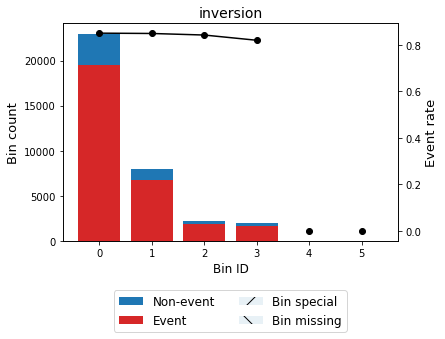

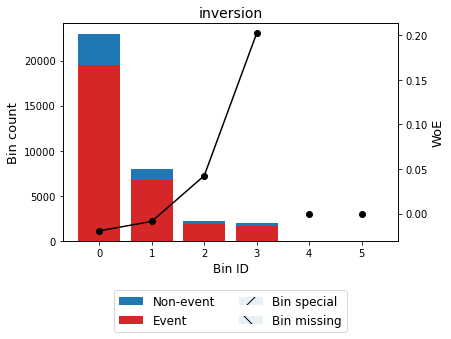

In [20]:
inversion_table.plot(metric="event_rate")
inversion_table.plot(metric="woe")

In [21]:


train["woe_comp_mixto1"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')   
train["woe_comp_externo1"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')   
train["woe_comp_externo2"]=optb_comp_externo2.transform(train["comp_externo2"],metric='woe')   
train["woe_comp_externo3"]=optb_comp_externo3.transform(train["comp_externo3"],metric='woe')   
train["woe_comp_externo4"]=optb_comp_externo4.transform(train["comp_externo4"],metric='woe')   
train["woe_comp_interno2"]=optb_comp_interno2.transform(train["comp_interno2"],metric='woe')   
train["woe_fecha_inicio"]=optb_fecha_inicio.transform(train["fecha_inicio"],metric='woe')   
train["woe_comp_interno1"]=optb_comp_interno1.transform(train["comp_interno1"],metric='woe')   
train["woe_comp_interno2"]=optb_comp_interno2.transform(train["comp_interno2"],metric='woe')   
train["woe_categoria1"]=optb_categoria1.transform(train["categoria1"],metric='woe')   
train["woe_categoria2"]=optb_categoria2.transform(train["categoria2"],metric='woe')   
train["woe_categoria3"]=optb_categoria3.transform(train["categoria3"],metric='woe')   
train["woe_inversion"]=optb_inversion.transform(train["inversion"],metric='woe') 

<ipython-input-21-6b41284f3c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_mixto1"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')
<ipython-input-21-6b41284f3c35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_externo1"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')
<ipython-input-21-6b41284f3c35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

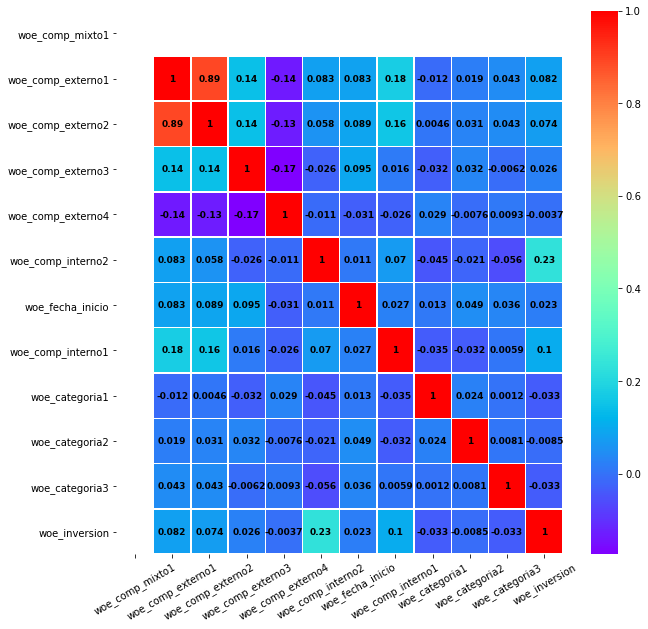

In [22]:
corr = train.iloc[:,17:].corr()

xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [23]:
#['Y',"woe_comp_mixto1","woe_comp_externo1","woe_comp_externo2","woe_comp_externo3","woe_fecha_inicio","woe_categoria2","woe_categoria3"]

In [24]:
X_woe_train=train.iloc[:,17:28]
y_train=train.iloc[:,16]
#X_woe_train.head()

X_woe_train.head()


,woe_comp_mixto1,woe_comp_externo1,woe_comp_externo2,woe_comp_externo3,woe_comp_externo4,woe_comp_interno2,woe_fecha_inicio,woe_comp_interno1,woe_categoria1,woe_categoria2,woe_categoria3
48824,-8.881784e-16,0.061401,0.116268,0.344659,-0.006943,0.013554,-1.064903,-0.040942,0.071420,-0.352125,0.017161
2704,-8.881784e-16,-0.099449,-0.116371,-0.005403,-0.006943,0.013554,-3.097952,-0.040942,0.071420,0.094416,0.037628
25631,-8.881784e-16,-0.149951,-0.134565,0.280531,-0.006943,0.013554,-3.097952,0.121005,0.071420,0.094416,-0.013957
7285,-8.881784e-16,-0.099449,-0.116371,-0.111215,-0.006943,0.013554,-3.097952,-0.040942,-0.174687,-0.158514,0.037628
27346,-8.881784e-16,0.061401,0.116268,-0.111215,-0.006943,0.013554,-0.083520,-0.040942,0.022350,-0.158514,-0.013957


In [30]:
#train=train[['Y',"woe_comp_externo1","woe_comp_externo2","woe_comp_externo3","woe_fecha_inicio","woe_categoria2","woe_categoria3"]]
train=train[['Y',"woe_comp_externo1","woe_comp_externo3","woe_fecha_inicio","woe_categoria2","woe_categoria3"]]

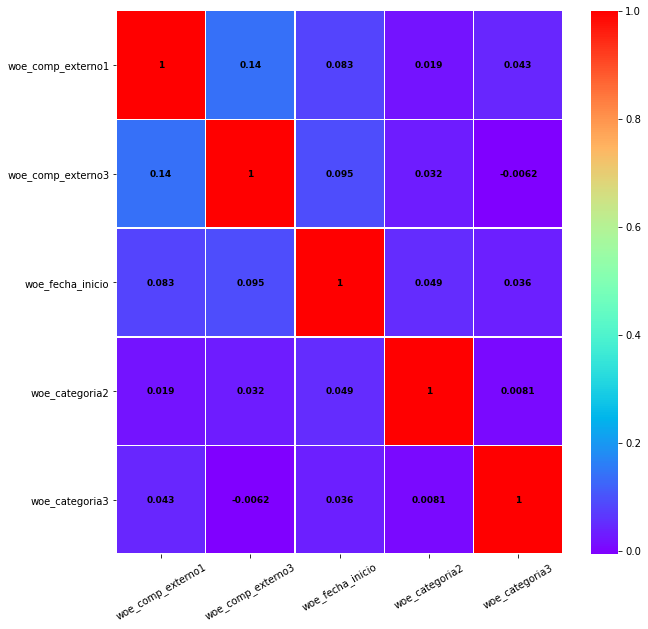

In [31]:
corr = train.iloc[:,1:].corr()
corr
xticks = list(corr.index)  
yticks = list(corr.index)  
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(1, 1, 1)

sns.heatmap(corr,annot=True,cmap="rainbow",ax=ax1,linewidths=.5,annot_kws={'size':9,'weight':'bold', 'color':'k'})
ax1.set_xticklabels(xticks, rotation=30, fontsize=10)
ax1.set_yticklabels(yticks, rotation=0, fontsize=10)
plt.show()

In [32]:
model=LogisticRegression()
clf=model.fit(X_woe_train,y_train)

y_pred
 [1 1 1 ... 1 1 1]
y_pred1
 [3.12446054 4.74164076 4.87483114 ... 2.38139241 5.25985228 3.13968856]


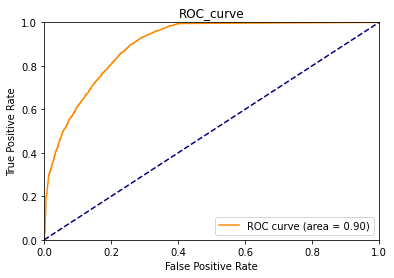

In [34]:
y_pred=clf.predict(X_woe_train)
y_pred1=clf.decision_function(X_woe_train)
print('y_pred\n',y_pred)
print('y_pred1\n',y_pred1)

fpr,tpr,threshold = roc_curve(y_train, y_pred1)
roc_auc = auc(fpr,tpr)
plot(fpr,tpr,color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_curve')
plt.legend(loc="lower right")
plt.show()


In [43]:
coe=model.coef_
coe

array([[ 0.23729805,  0.79901496, -1.01337486, -0.30611614, -1.12206206]])

In [44]:
coe=model.coef_
coe

array([[ 0.23729805,  0.79901496, -1.01337486, -0.30611614, -1.12206206]])

In [47]:
model.intercept_


array([1.72728662])

In [50]:
#optenemos el predict

y_pre_fit=clf.predict_proba(X_woe_train)
len(y_pre_fit[:,0])

35000

In [53]:
y_pre_fit

array([[0.03973695, 0.96026305],
       [0.00842882, 0.99157118],
       [0.00641936, 0.99358064],
       ...,
       [0.08360932, 0.91639068],
       [0.00666244, 0.99333756],
       [0.04084386, 0.95915614]])

In [56]:
type(y_train)

pandas.core.series.Series

In [52]:
data=y_train.to_frame()

In [57]:
data['estimado']=y_pre_fit[:,1]
data

,Y,estimado
48824,1,0.960263
2704,1,0.991571
25631,1,0.993581
7285,1,0.991511
27346,1,0.858370
...,...,...
16304,0,0.040739
79,1,0.900577
12119,1,0.916391
14147,1,0.993338


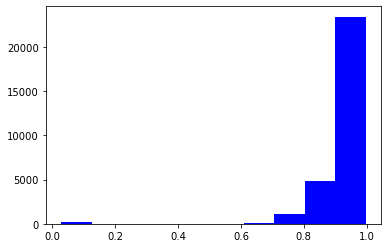

In [62]:
hist(data[data['Y']==1]['estimado'],color="blue")
show()

In [79]:
#KS
ecdf_buenos=ECDF(data.loc[data.Y==1,"estimado"])
ecdf_malos=ECDF(data.loc[data.Y==0,"estimado"])
grid_score=np.sort(data.estimado.unique())
prob_acu_buenos=ecdf_buenos(grid_score)
prob_acu_malos=ecdf_malos(grid_score)


In [84]:
abs_dif=np.abs(prob_acu_buenos-prob_acu_malos)
ks=np.max(abs_dif)
ks

0.63220577345185

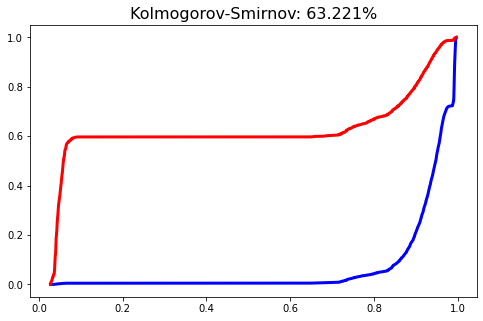

In [93]:
fig,ax=plt.subplots(figsize=(8,5))
ax.set_title(f"Kolmogorov-Smirnov: {ks:.3%}",fontsize=16)
plot(grid_score,prob_acu_buenos,color='blue',linewidth=3)
plot(grid_score,prob_acu_malos,color='red',linewidth=3)